In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [77]:
df = pd.read_table('/Users/user/Projects/SP/for_ex/seeds_dataset.txt', delimiter = ';', index_col=None)
print(df)

      area  perimeter  compactness  length_of_kernel  width_of_kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
207  12.19        NaN       0.8783             5.137              NaN   
208  11.23      12.88       0.8511             5.140            2.795   
209  13.20      13.66       0.8883             5.236            3.232   
210  11.84      13.21       0.8521             5.175            2.836   
211  12.30      13.34       0.8684             5.243            2.974   

     asymmetry_coefficient  length_of_kernel_groove  class  
0                    2.221                    5.220      1  
1

In [36]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
for c in categorical_columns:
    print(c, ':', df[c].unique())

In [78]:
#удалить дубликаты
df.drop_duplicates(subset=None, keep='first', inplace=True,
                          ignore_index=False)

#удалить дубликаты относящиеся к разным классам
df.drop_duplicates(subset=df.columns[:-1], keep=False, inplace=True,
                          ignore_index=False)

In [79]:
#удал. не инф столбов
for col in df.columns:
    count = {}
    for var in df[col]:
        if var in count:
            count[var] += 1
        else:
            count[var] = 1
    for k in count.keys():
        n = len(df)
        if count[k] > n * 0.95:
            df.pop(col)
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
207,12.19,NaN,0.8783,5.137,NaN,3.631,4.870,3
208,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
209,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
210,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [80]:
#поиск нанов
df[df.isnull().T.any()]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
17,15.69,14.75,0.9058,5.527,3.514,NaN,5.046,1
138,15.57,NaN,0.8527,5.920,3.231,2.640,NaN,2
207,12.19,NaN,0.8783,5.137,NaN,3.631,4.870,3


In [81]:
#удалить столбцы с Nan
for col in df.columns:
    prc_missing = np.mean(df[col].isna())
    if round(prc_missing*100) > 40:
        df.pop(col)
            
for row in range(df.shape[0]):
    prc_missing = np.mean(df.iloc[row].isna())
    if round(prc_missing*100) > 40:
        df.pop(row)
print(df)

      area  perimeter  compactness  length_of_kernel  width_of_kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
207  12.19        NaN       0.8783             5.137              NaN   
208  11.23      12.88       0.8511             5.140            2.795   
209  13.20      13.66       0.8883             5.236            3.232   
210  11.84      13.21       0.8521             5.175            2.836   
211  12.30      13.34       0.8684             5.243            2.974   

     asymmetry_coefficient  length_of_kernel_groove  class  
0                    2.221                    5.220      1  
1

In [82]:
#замена Nan-ов
means = df.mean(axis=0)  
for c in df.columns:
    if df[c].isna().any():
        df[c].fillna(means[c], inplace = True)       
print(df)

      area  perimeter  compactness  length_of_kernel  width_of_kernel  \
0    15.26  14.840000       0.8710             5.763         3.312000   
1    14.88  14.570000       0.8811             5.554         3.333000   
2    14.29  14.090000       0.9050             5.291         3.337000   
3    13.84  13.940000       0.8955             5.324         3.379000   
4    16.14  14.990000       0.9034             5.658         3.562000   
..     ...        ...          ...               ...              ...   
207  12.19  14.563932       0.8783             5.137         3.260734   
208  11.23  12.880000       0.8511             5.140         2.795000   
209  13.20  13.660000       0.8883             5.236         3.232000   
210  11.84  13.210000       0.8521             5.175         2.836000   
211  12.30  13.340000       0.8684             5.243         2.974000   

     asymmetry_coefficient  length_of_kernel_groove  class  
0                    2.221                    5.220      1  
1

In [83]:
#поиск нанов
df[df.isnull().T.any()]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class


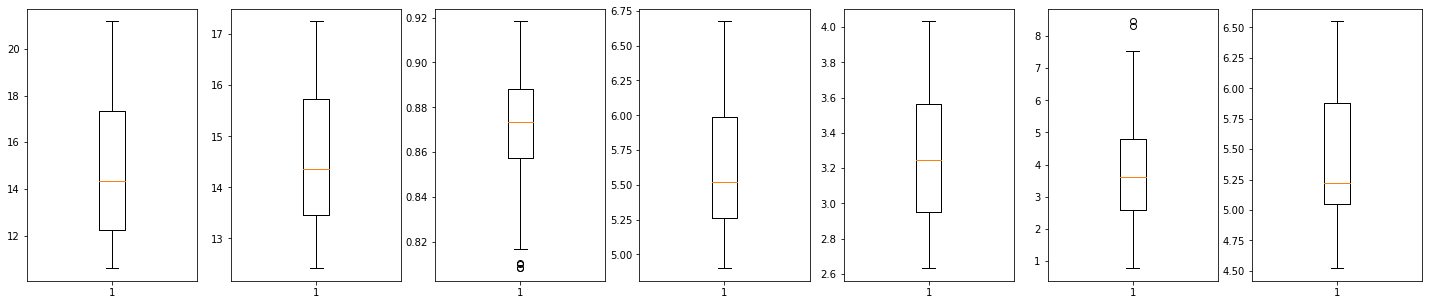

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 7, figsize = (25, 5))
a = 0
for c in df.columns[:-1]:
    ax[a].boxplot(df[c])
    a+=1
